In [1]:
# 선형회귀 모델 - 모델 생성 3가지 방법 구현

import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

None
loss_metrics :  [25.31299591064453, 25.31299591064453]
실제값 :  [11. 32. 53. 64. 70.]
예측값 :  [17.209517 32.17723  47.144943 62.112656 77.080376]
설명력 :  0.9465970396995544
new 예측값 :  [24.693375 35.170776 89.05455 ]


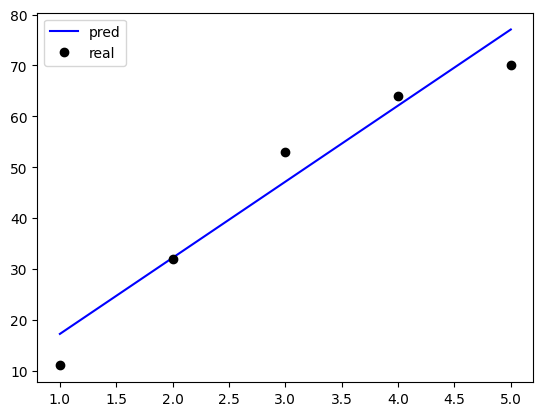

In [9]:
# 공부시간에 따른 성적 데이터 사용
x_data = np.array([1, 2, 3, 4, 5], dtype = np.float32).reshape(-1, 1)
# x_data = [[1],[2],[3],[4],[5]]
y_data = np.array([11, 32, 53, 64, 70], dtype = np.float32).reshape(-1, 1)

# 1) Sequantial api 사용 - 모델 구성이 순차적(단순)인 경우에 사용
model = Sequential() # 계층구조(Linear layer stack)
model.add(Input((1,)))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

print(model.summary())

opti = optimizers.SGD(learning_rate = 0.001)
model.compile(optimizer = opti, loss = 'mse', metrics = ['mse'])

history = model.fit(x = x_data, y = y_data, batch_size = 1, epochs = 100, verbose = 0)
loss_metrics = model.evaluate(x = x_data, y = y_data, verbose = 0)
print('loss_metrics : ', loss_metrics)

from sklearn.metrics import r2_score
y_pred = model.predict(x_data, verbose = 0)
print('실제값 : ', y_data.ravel())
print('예측값 : ', y_pred.ravel())
print('설명력 : ', r2_score(y_data, y_pred))  # 0.9481

# 새 데이터(n, 1)로 예측
new_data = np.array([1.5, 2.2, 5.8], dtype = np.float32).reshape(-1, 1)
new_pred = model.predict(new_data, verbose = 0).ravel()
print('new 예측값 : ', new_pred)

# 시각화
import matplotlib.pyplot as plt
plt.plot(x_data.ravel(), y_pred.ravel(), 'b', label = 'pred')
plt.plot(x_data.ravel(), y_data.ravel(), 'ko', label = 'real')
plt.legend()
plt.show()

In [11]:
# 2) Functional api 사용 - 유연한 구조, 입력 데이터로 여러층을 공유, 다양한 종류의 입출력 가능
# multi-inputmodel, # multi-outputmodel, 공유층 활용 모델, 비순차적 데이터 처리
from tensorflow.keras.models import Model

# inputs = Input(shape = (1,))
# outputs = Dense(units = 1, activation = 'linear')(inputs)
# model2 = Model(inputs, outputs)

inputs = Input(shape = (1,))
output1 = Dense(units = 16, activation = 'relu')(inputs)
output2 = Dense(units = 1, activation = 'linear')(output1)
# 이전 층을 다음 층 함수의 입력으로 사용하기 위해 변수에 할당
model2 = Model(inputs, output2)

opti2 = optimizers.SGD(learning_rate = 0.001)
model2.compile(optimizer = opti2, loss = 'mse', metrics = ['mse'])

history = model2.fit(x = x_data, y = y_data, batch_size = 1, epochs = 100, verbose = 0)
loss_metrics = model2.evaluate(x = x_data, y = y_data, verbose = 0)
print('loss_metrics : ', loss_metrics)

from sklearn.metrics import r2_score
y_pred2 = model2.predict(x_data, verbose = 0)
print('실제값 : ', y_data.ravel())
print('예측값 : ', y_pred2.ravel())
print('설명력 : ', r2_score(y_data, y_pred2))

loss_metrics :  [24.205123901367188, 24.205123901367188]
실제값 :  [11. 32. 53. 64. 70.]
예측값 :  [16.779413 31.540655 46.301895 61.063133 75.82436 ]
설명력 :  0.9489343166351318


In [13]:
# 3) Sub classing 사용 - 고난이도 작업에서 활용성 높음, 동질적 구조에 적합
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.d1 = Dense(units = 16, activation = 'relu')
    self.d2 = Dense(units = 1, activation = 'linear')
  # x = input 매개변수 : 함수형 api와 유사하나 Input 객체를 생성 x
  # 계산 작업 등 가능
  # model.fit(), evaluate(), predict() 하면 자동호출
  def call(self, x):
    x = self.d1(x)
    return self.d2(x)

model3 = MyModel()

opti3 = optimizers.SGD(learning_rate = 0.001)
model3.compile(optimizer = opti3, loss = 'mse', metrics = ['mse'])

history = model3.fit(x = x_data, y = y_data, batch_size = 1, epochs = 100, verbose = 0)
loss_metrics = model3.evaluate(x = x_data, y = y_data, verbose = 0)
print('loss_metrics : ', loss_metrics)

from sklearn.metrics import r2_score
y_pred3 = model3.predict(x_data, verbose = 0)
print('실제값 : ', y_data.ravel())
print('예측값 : ', y_pred3.ravel())
print('설명력 : ', r2_score(y_data, y_pred3))

loss_metrics :  [64.31083679199219, 64.31083679199219]
실제값 :  [11. 32. 53. 64. 70.]
예측값 :  [15.17274  27.863836 40.55493  53.24603  65.937126]
설명력 :  0.8643231391906738


In [17]:
# 3-1) Sub classing 사용
from tensorflow.keras.layers import Layer
# Layer(사용자 정의층 작성용)
# Keras의 layers 패키지에 정의된 layer 대신 새로운 연산을 하는 layer 또는 여러 layer를 하나로 묶은 layer를 구현할때 사용가능
class MyLinear(Layer):
  def __init__(self, units = 1, **kwargs):
    super(MyLinear, self).__init__(**kwargs)
    # 여러 layer를 하나로 묶은 layer를 구현
    self.units = units

  # 내부적으로 call 호출, 모델의 가중치 관련 내용 기술
  def build(self, input_shape):
    print('build : input_shape = {}'.format(input_shape))
    self.w = self.add_weight(shape = (input_shape[-1], self.units),
                             initializer = 'random_normal',
                             trainable = True)
    self.b = self.add_weight(shape = (self.units,),
                             initializer = 'zeros',
                             trainable = True)
  # 정의된 값들을 이용해 해당층의 로직을 정의
  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

class MyMlp(Model):
  def __init__(self, **kwargs):
    super(MyMlp, self).__init__(**kwargs)
    self.linear1 = MyLinear(2)
    self.linear2 = MyLinear(1)

  def call(self, inputs):
    x = self.linear1(inputs)
    x = tf.nn.relu(x)
    return self.linear2(x)

model4 = MyMlp()

opti4 = optimizers.SGD(learning_rate = 0.001)
model4.compile(optimizer = opti4, loss = 'mse', metrics = ['mse'])

history = model4.fit(x = x_data, y = y_data, batch_size = 1, epochs = 100, verbose = 0)
loss_metrics = model4.evaluate(x = x_data, y = y_data, verbose = 0)
print('loss_metrics : ', loss_metrics)

from sklearn.metrics import r2_score
y_pred4 = model4.predict(x_data, verbose = 0)
print('실제값 : ', y_data.ravel())
print('예측값 : ', y_pred4.ravel())
print('설명력 : ', r2_score(y_data, y_pred4))

build : input_shape = (1, 1)
build : input_shape = (1, 2)
loss_metrics :  [75.04788970947266, 75.04788970947266]
실제값 :  [11. 32. 53. 64. 70.]
예측값 :  [14.450162 27.072895 39.69563  52.318363 64.94109 ]
설명력 :  0.8416711091995239
